<a href="https://colab.research.google.com/github/NaoyaToku109/pub/blob/main/robot_inv_kinetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math

#======================================================================================================
#     const vals
#======================================================================================================
_l1 = 220
_l2 = 220
_l3 = 140

#	DFD6755 	DFD6561 	DFD6342
#アーム1 	290 	220 	140
#アーム2 	290 	220 	140
#アーム3 	135 	140 	150

#======================================================================================================
#     sub routines
#======================================================================================================
def _a(y,th):
  a = y - (_l3*math.sin(math.radians(th)))
  return a

def _b(x,th):
  b = x - (_l3*math.cos(math.radians(th)))
  return b

def _c(x,y,th):
  a = _a(y,th)
  b = _b(x,th)
  c = ((a**2) + (b**2) + (_l1**2) - (_l2**2)) / (2*_l1)
  return c
def _d(x,y,th):
  a = _a(y,th)
  b = _b(x,th)
  d = ((a**2) + (b**2) - (_l1**2) + (_l2**2))/ (2*_l2)
  return d

#===========================================================
#   順運動公式
#===========================================================
def _arm1(q1):
  p = [ _l1 * math.cos(q1) ,  _l1 * math.sin(q1) ]
  return p
def _arm2(q1,q2):
  arm1 = _arm1(q1)
  p = [ arm1[0] + (_l2*math.cos(q1+q2)) , arm1[1]+(_l2 * math.sin(q1+q2)) ]
  return p
def _arm3(q1,q2,q3):
  arm2 = _arm2(q1,q2)
  p = [ arm2[0] + (_l3*math.cos(q1+q2+q3)) , arm2[1] + (_l3*math.sin(q1+q2+q3)) ]
  return p


a[60.0] / b[-70.00000000000001] / c[19.318181818181817] / d[19.318181818181817
[2.7193936890048964, -2.719393689004897]
q1[61.4938147477495] / q2[155.80978121449212] / q3[-127.30359596224162
xy (-69.99999999999993,199.99999999999991)  θ:90.0


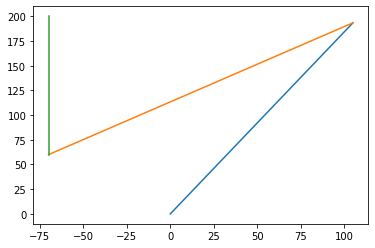

q1[217.30359596224162] / q2[-155.80978121449212] / q3[28.506185252250518
xy (-69.99999999999987,199.9999999999999)  θ:90.0


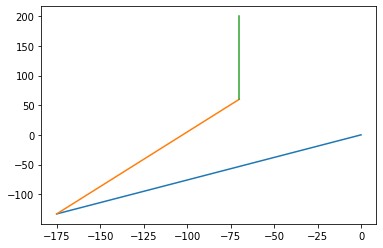

In [ ]:
#目的の座標です。
x = -70
y = 200
th = 90     #アーム３の姿勢です。

a = _a(y,th)    #リンク2までの
b = _b(x,th)
c = _c(x,y,th)
d = _d(x,y,th)

print('a['+str(a)+'] / b['+str(b)+'] / c['+str(c)+'] / d[' + str(d))

#====================================================
#     φ
#====================================================
phy = math.atan2(a,b)

#====================================================
#     θ1
#====================================================
_sub_1 =math.atan2(math.sqrt((a**2)+(b**2)-(c**2)),c)
q1 = [ phy -_sub_1 , phy + _sub_1 ]   #+-の2種類ある。

#====================================================
#     θ2
#====================================================
#q1 の二パターンにそれぞれ２つの符号がある。
_sub_2  = math.atan2(math.sqrt((a**2)+(b**2)-(d**2)),d)
q2 = [ phy - q1[0] + _sub_2 , phy - q1[1] - _sub_2 ] 
print(q2)

#====================================================
#     θ3
#====================================================
#toku このとき、q1は2個 、 q2は4個 解がある
rad = math.radians(th)
q3 = [ rad - (q1[0]+q2[0])  , rad - (q1[1]+q2[1]) ]

import matplotlib.pyplot as plt
plt.xlim()
# (0,4)から(6,9)まで直線を引く
# ax.plot([0, 6], [4, 9], color = "sienna")
#アーム1までの直線です。
for i in range(2):
  _q1 = q1[i]
  _q2 = q2[i]
  _q3 = q3[i]
  arm = [ _arm1(_q1) , _arm2(_q1,_q2) , _arm3(_q1,_q2,_q3) ]

  print('q1['+str(math.degrees(_q1))+'] / q2['+str(math.degrees(_q2))+'] / q3['+str(math.degrees(_q3)))
  print('xy (' + str(arm[2][0]) + ',' + str(arm[2][1]) + ')  θ:' + str(math.degrees(_q1+_q2+_q3)) )

  plt.plot( [ 0         , arm[0][0] ] , [ 0         , arm[0][1] ] )
  plt.plot( [ arm[0][0] , arm[1][0] ] , [ arm[0][1] , arm[1][1] ] )
  plt.plot( [ arm[1][0] , arm[2][0] ] , [ arm[1][1] , arm[2][1] ] )
  plt.show()
